In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("train.csv")
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [217]:
data=df.copy()
data.dropna(axis=0,inplace=True)
data=data.reset_index()
W=[1,2]
for column in data.columns:
    data[column]=(data[column]-data[column].mean())/data[column].std()
X=pd.DataFrame()
X["x0"]=np.ones(len(data)).copy()
X["x1"] = data["x"].copy()
Y=data["y"].copy()

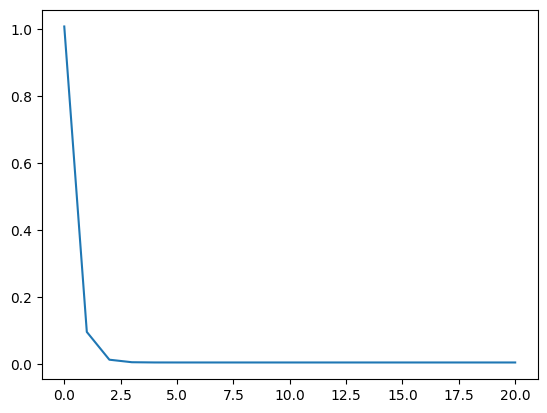

In [218]:
def gradient_decent(X,W,Y,alpha=0.001,iteration=20):
    J=np.mean((X.dot(W)-Y)**2)/2
    costH=[J]
    for i in range(iteration):
        diff= X.dot(W)-Y
        g=np.mean(X.T.dot(diff))
        W=W-alpha*g
        J=np.mean((X.dot(W)-Y)**2)/2
        costH.append(J)
    return costH,W
costH,Wn=gradient_decent(X,W,Y)
plt.plot(costH)

In [219]:
Wn

array([-0.00232838,  0.99767162])

In [220]:
X["y"]=X.dot(Wn)

In [221]:
X

,x0,x1,y
0,1.0,-0.898453,-0.898689
1,1.0,-0.000494,-0.002821
2,1.0,-1.209285,-1.208797
3,1.0,-0.414937,-0.416299
4,1.0,1.277370,1.272068
...,...,...,...
694,1.0,0.275801,0.272830
695,1.0,1.484591,1.478806
696,1.0,1.104686,1.099785
697,1.0,0.552096,0.548482


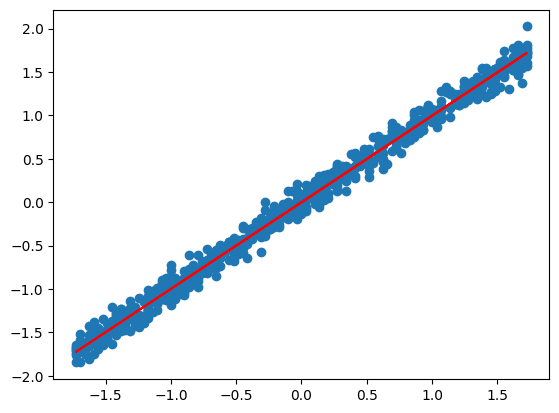

In [222]:
fig,ax=plt.subplots()
ax.scatter(data["x"],data["y"])
ax.plot(X["x1"],X["y"],color="red")

In [223]:
df_test=pd.read_csv("test.csv")

In [224]:
df_test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [225]:
data_test=df_test.copy()
for column in data_test.columns:
    data_test[column]=(data_test[column]-data_test[column].mean())/data_test[column].std()

In [226]:
data_test

,x,y
0,0.914365,0.982754
1,-1.050251,-0.964099
2,-1.015169,-0.880443
3,-1.085334,-1.147092
4,-0.524015,-0.321799
...,...,...
295,0.703871,0.596490
296,-0.173190,-0.133126
297,0.142552,0.099258
298,0.388129,0.415944


In [227]:
Yp=data_test["x"]*Wn[1]+Wn[0]

In [228]:
print(f"{Yp},{data_test['y']}")

0      0.909908
1     -1.050134
2     -1.015134
3     -1.085135
4     -0.525123
         ...   
295    0.699904
296   -0.175115
297    0.139891
298    0.384897
299   -0.140115
Name: x, Length: 300, dtype: float64,0      0.982754
1     -0.964099
2     -0.880443
3     -1.147092
4     -0.321799
         ...   
295    0.596490
296   -0.133126
297    0.099258
298    0.415944
299    0.043149
Name: y, Length: 300, dtype: float64


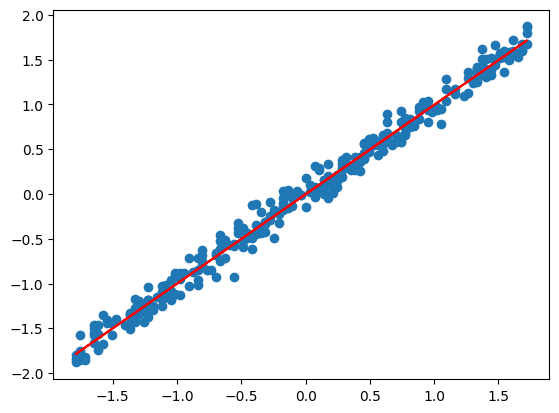

In [229]:
fig,ax=plt.subplots()
ax.scatter(data_test["x"],data_test["y"])
ax.plot(data_test["x"],Yp,color="red")